Has the network latency gone up since we switched internet service providers?

$H_{0}$  -there is no difference between the internet service providers(or actually gone down)
$H_{1}$-there is a network latency increase since "we" swithced companies
 - true positive = i determine that latency has increased and it has
 - true negative = I determined that latency has stayed the same or decreased
 
$H_{0}$ -the internet seems to be working at the same speed

$H_{1}$ -clutter on the computer can also cause it to be slow

Type 1: Accept $H_{0}$ = rejecting that latency increased when it decreased

Type 2: Reject $H_{0}$ = accepting latency has decreased when it  increased

 
 

Note: This would be determined via a paired t-test, in which we look at a sample of our data under the previous condition (old internet service provider), and then look at a sample of our data under the current condition (new internet service provider). A paired t-test is used when we are interested in the difference between two variables for the same subject, and often the two variables are separated by time.

Is the website redesign any good?

$H_{0}$ -there is no difference between the previous and the current design 

$H_{1}$-there is a difference and the new one is better 

 - true positive - i determine that the traffic has increased and it has 
 - true negative - i determine that the traffic has decreased or stayed the same 
$H_{0}$ -the design seems to be just as good as the other one 

$H_{1}$ -the new design seems to have more internet traffic

Type 1: Accepting $H_{0}$ = rejecting that its the design that is bringing more traffic when it actually decreased

Type 2: Rejeting $H_{0}$ = accepting that that the design is bringing in more traffic when when it actually isnt

Note: Think about the number of confounding factors that might drive changes to a websites activity beyond a simple redesign. If we are launching the new website the day before Black Friday, it is inappopriate to compare that to the previous day. We would need to compare it to the last website on Black Friday. Sometimes perfect comparisons are not achievable in the rapidly changing business world, but we must do our best to adequately control for as many factors as we can. This could be achieved through A/B testing, where we run two versions of the website at the same time and look at our comparable metrics. This would be more ideal than a paired t-test approach, as we could utilize an independent samples t-test, and generally its easier to control confounding factors with this approach.


Is our television ad driving more sales?

$H_{0}$ -there isn't a difference in sales

$H_{1}$ -there is an increase in sales since the new tv ad

 - true positive - i determine that sales increased since the ad
 - true negative -  i determined that sales stayed the same or decreased since the ad
 
$H_{0}$ -the sales numbers are not affected by the new ads

$H_{1}$ -the sales numbers seem to be increasing since the ad started airing

Type 1: Accepting $H_{0}$ - rejecting that there is a diffeerence(decreased) in sales 

Type 2: Rejecting $H_{0}$ -accepting that there is a increase caused by sales 

always capture all possible outcomes

Note: By wording my null hypothesis as the antithesis to the alternative hypothesis, I have captured all possible outcomes between the two hypotheses.



|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*||  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|One sample t-test: scipy.stats.ttest_1samp|Normally Distributed\*\*||   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples|Independent t-test (or 2-sample): scipy.stats.ttest_ind|Independent, Normally Distributed\*\*, Equal Variances\*\*\*||   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA: scipy.stats.f_oneway|Independent, Normally Distributed\*\*, Equal Variances**||   

\*If assumptions can't be met, the equivalent non-parametric test can be used.  
\*\*Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accomodate this assumption.

In [129]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env



# What are we comparing?

# average time (numeric continuous values) for two different groups (categories)
# One sample or two sample? two sample ttest aka indipendent ttest 
# One tailed or two tailed?

# A. Plot Distribution
# B. Set Hypothesis
# C. Set Alpha
# D. Verify Assumptions
# E. Compute test statistic and probability (t-statistic & p-value)
    scipy.stats.ttest_1samp
    For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼 and 𝑡 > 0
    ||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{a} == \mu_{b}$|  
|Alternative Hypothesis (2-tail, significantly different) |$H_{a}$| $\mu_{a} != \mu_{b}$|  
|Alternative Hypothesis (1-tail, a is significantly smaller than b) |$H_{a}$| $\mu_{a} < \mu_{b}$|  
|Alternative Hypothesis (1-tail, a is significantly larger than b) |$H_{a}$| $\mu_{a} > \mu_{b}$| 
# F. Decide











# Comparing means exercises 

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [ ]:

# H_0: Average time to sell at office 1 = average time to sell at office 2
# H_a: Average time to sell at office 1 != average time to sell at office 2

In [5]:
mean1 = 90
sdev1 = 15
ssize1 = 40


mean2 = 100
sdev2 = 20
ssize2 = 50

In [6]:
α = 0.05


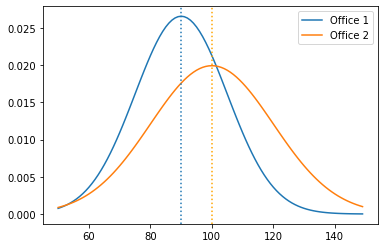

In [7]:
x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'Office 1')
plt.plot(x, y2, label = 'Office 2')
plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color = 'orange')

plt.legend()

In [8]:
# checking the ttest and the p  
t, p = stats.ttest_ind_from_stats(mean1,sdev1,ssize1,mean2, sdev2, ssize2)
t,p


(-2.6252287036468456, 0.01020985244923939)

In [9]:
if (p < α):
    print("We reject the null hypothesis!")
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis!


In [2]:
from pydataset import data

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
mpg.dropna()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [12]:
mpg['mileage_avg']=stats.hmean(mpg[["cty", "hwy"]], axis = 1) 
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727


In [18]:
f_efficiency1999 = mpg[mpg.year == 1999].mileage_avg
f_efficiency2008 = mpg[mpg.year == 2008].mileage_avg
#use harmonic mean in this situation


<AxesSubplot:>

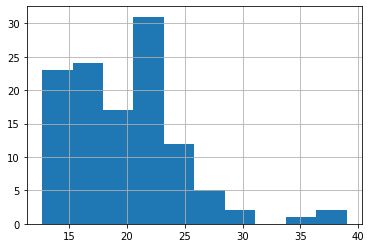

In [19]:
f_efficiency1999.hist()

<AxesSubplot:>

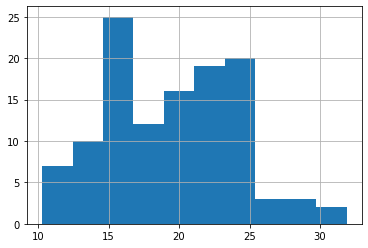

In [20]:
f_efficiency2008.hist()

In [21]:
f_efficiency1999.var()

25.850396545865912

In [22]:
f_efficiency2008.var()

22.550836772260343

In [27]:
μth = mpg.mileage_avg.mean()
μth

19.585525317633177

In [14]:
α = 0.05

In [24]:
f_efficiency1999.mean()

19.68238764869729

In [23]:
f_efficiency2008.mean()

19.488662986569054

In [25]:
t, p = stats.ttest_ind(f_efficiency1999,f_efficiency2008 )
t, p

(0.3011962975077886, 0.7635345888327115)

In [18]:
if (pval < α) and (tstat > 0):
    print("We reject the null hypothesis!")
else:
    print('We fail to reject the null hypothesis')


We fail to reject the null hypothesis


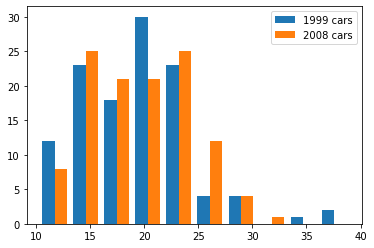

In [30]:
plt.hist([f_efficiency1999,f_efficiency2008 ], label=['1999 cars', '2008 cars'])
plt.legend(loc="upper right")

We fail to reject the null hypothesis


are compact cars more fuel efficient than the average 


In [32]:
mpg['class']= mpg["class"].astype(str)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [33]:
mpg.rename(columns= {"class": "cartype"}, inplace = True)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,cartype,mileage_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727


In [34]:
f_eff = mpg[mpg.cartype == "compact"].mileage_avg
#  could have used ["class"]
f_eff.mean()

23.500416808701296

In [35]:
tstat3, pval3 = stats.ttest_1samp(f_eff, μth)
tstat3, pval3

(7.512360093161354, 1.5617666348807727e-09)

In [37]:
if (pval3 / 2 < α) and (tstat3 > 0):
    print("We reject the null hypothesis!")
else:
    print('We fail to reject the null hypothesis')


We reject the null hypothesis!


In [38]:
compact_c = mpg[mpg.cartype == 'compact'].mileage_avg
non_compact_c = mpg[mpg.cartype != 'compact'].mileage_avg


<AxesSubplot:>

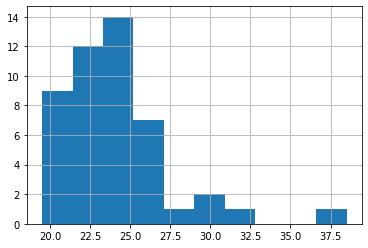

In [48]:
compact_c.hist()

<AxesSubplot:>

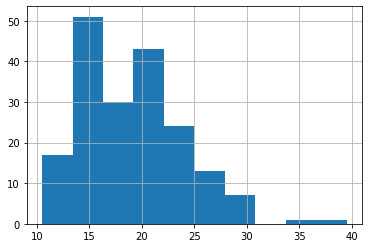

In [49]:
non_compact_c.hist()

In [40]:
tstat3, pval3 = stats.levene(compact_c, non_compact_c)
if pval < 0.05:
    print('We can reject the H0 that the two samples have equal variance')
#    levene checks if the variances are similar

In [44]:
alpha = 0.05

In [45]:
t, p = stats.ttest_ind(compact_c, non_compact_c, equal_var= False) #we check if var = false or true
# t, p = t-test: (group A, group B) ==> comparison of mu_a > mu_b
t, p/2, alpha

(8.128810422808078, 8.009030328061537e-13, 0.05)

In [46]:
print("is p/2 < alpha?", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [47]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Do manual cars get better gas mileage than automatic cars?


In [41]:
auto_fe = mpg[mpg.trans.str.contains('auto')].mileage_avg
manual_fe = mpg[mpg.trans.str.contains('manual')].mileage_avg


<AxesSubplot:>

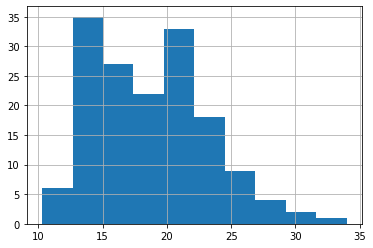

In [42]:
auto_fe.hist()

<AxesSubplot:>

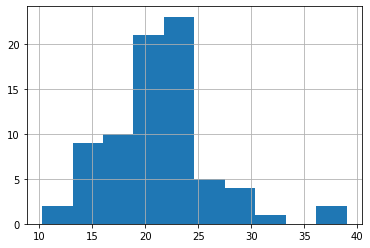

In [43]:
manual_fe.hist()

In [46]:
auto_fe.var(), manual_fe.var()
# check variance 

(20.428279095002054, 25.665633639828275)

In [47]:
stats.levene(auto_fe, manual_fe)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [48]:
t, p = stats.ttest_ind(manual_fe, auto_fe, equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

In [49]:
auto_fe.mean(), manual_fe.mean()


(18.583199507835747, 21.629228592155194)

In [59]:
mpg["transmission_type"] = np.where(mpg.trans.str.contains("auto"), "Auto Transmission", "Manual Transmission")

In [60]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,cartype,mileage_avg,transmission_tyoe,transmission_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,Auto Transmission,Auto Transmission
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,Manual Transmission,Manual Transmission
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,Manual Transmission,Manual Transmission
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,Auto Transmission,Auto Transmission
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,Auto Transmission,Auto Transmission
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298,Auto Transmission,Auto Transmission
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000,Manual Transmission,Manual Transmission
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524,Auto Transmission,Auto Transmission
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727,Manual Transmission,Manual Transmission


Text(0.5, 1.0, 'Manual transmission gets better fuel effiency')

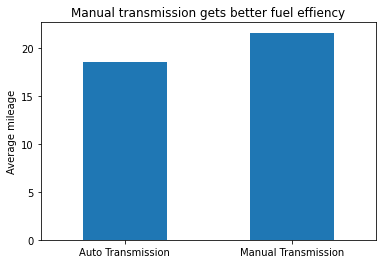

In [58]:

mpg.groupby('transmission_type').mileage_avg.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Manual transmission gets better fuel effiency')

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("Telco.csv")

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
 13  service_type       7049 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 771.1+ KB


In [132]:
df = df.dropna()

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7048
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7038 non-null   object 
 1   gender             7038 non-null   object 
 2   is_senior_citizen  7038 non-null   int64  
 3   partner            7038 non-null   object 
 4   dependents         7038 non-null   object 
 5   phone_service      7038 non-null   int64  
 6   internet_service   7038 non-null   int64  
 7   contract_type      7038 non-null   int64  
 8   payment_type       7038 non-null   object 
 9   monthly_charges    7038 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7038 non-null   object 
 12  tenure             7038 non-null   float64
 13  service_type       7038 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 824.8+ KB


# Exercise 
Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? 
What happens if you control for phone and internet service?


In [174]:
x= df["tenure"]
y = df["monthly_charges"]
r, p = stats.pearsonr(x, y)
print(f'r = {r:.5f}')
print(f'p = {p:.5f}')
print("therefore we reject the null hypothesis")
# however it is a weak correlation 

r = 0.24718
p = 0.00000
therefore we reject the null hypothesis


In [22]:
df.head(20)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,3.2
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No,8.2
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No,72.1
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,No,63.5
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No,7.1
9,0016-QLJIS,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,No,65.9


In [162]:
df["service_type"] = df['internet_service'].map({0: "No internet", 1: "DSL", 2: "Fiber Optics"})
df

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No,9.0,DSL
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No,9.1,DSL
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes,3.8,Fiber Optics
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,12.6,Fiber Optics
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,3.2,Fiber Optics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No,13.5,DSL
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes,22.0,Fiber Optics
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No,1.8,DSL
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No,68.2,DSL


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


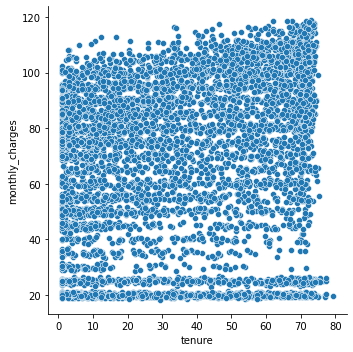

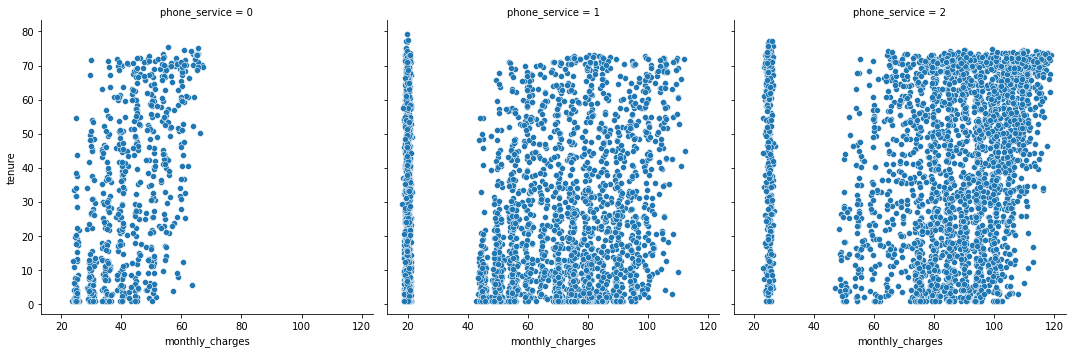

In [149]:
sns.relplot(x,y)
sns.relplot(data=df, y="tenure" , x="monthly_charges", col="phone_service")

In [150]:
x= df["tenure"]
z = df["total_charges"]
r, p = stats.pearsonr(x, z)
print(f'r = {r:.5f}')
print(f'p = {p:}')

r = 0.82582
p = 0.0


reject null hypothesis

control for phone and internet service

In [112]:
alpha = 0.05

In [153]:
def corr_tenure_and_monthly(df):
    return pd.Series(stats.pearsonr(df.tenure, df.monthly_charges), index =["r","p"])
# first find pearsonr and p for teanure and monthly charges, then group by service type and phone service

In [154]:
df.groupby(["service_type", "phone_service"]).apply(corr_tenure_and_monthly)


r              p
service_type phone_service                         
DSL          0              0.592922   6.954735e-66
             1              0.562383   2.328648e-88
             2              0.610191   1.647669e-71
Fiber Optics 1              0.529938   5.607453e-85
             2              0.573823  3.939472e-170
No internet  1             -0.013593   6.404636e-01
             2             -0.031353   5.645227e-01

In [175]:
if p < alpha:
    print("reject the null hypothesis")
else:
    print ("accept the null hypothesis")

reject the null hypothesis


$H_{0}$ there is no linear correlation between tenure and monthly cost

$H_{1}$ there is a linear corelation between tenure and monthly cost

Overall, r & p scores demonstrate a weak positive correlation, but the magnitude of the relationship is relatively small


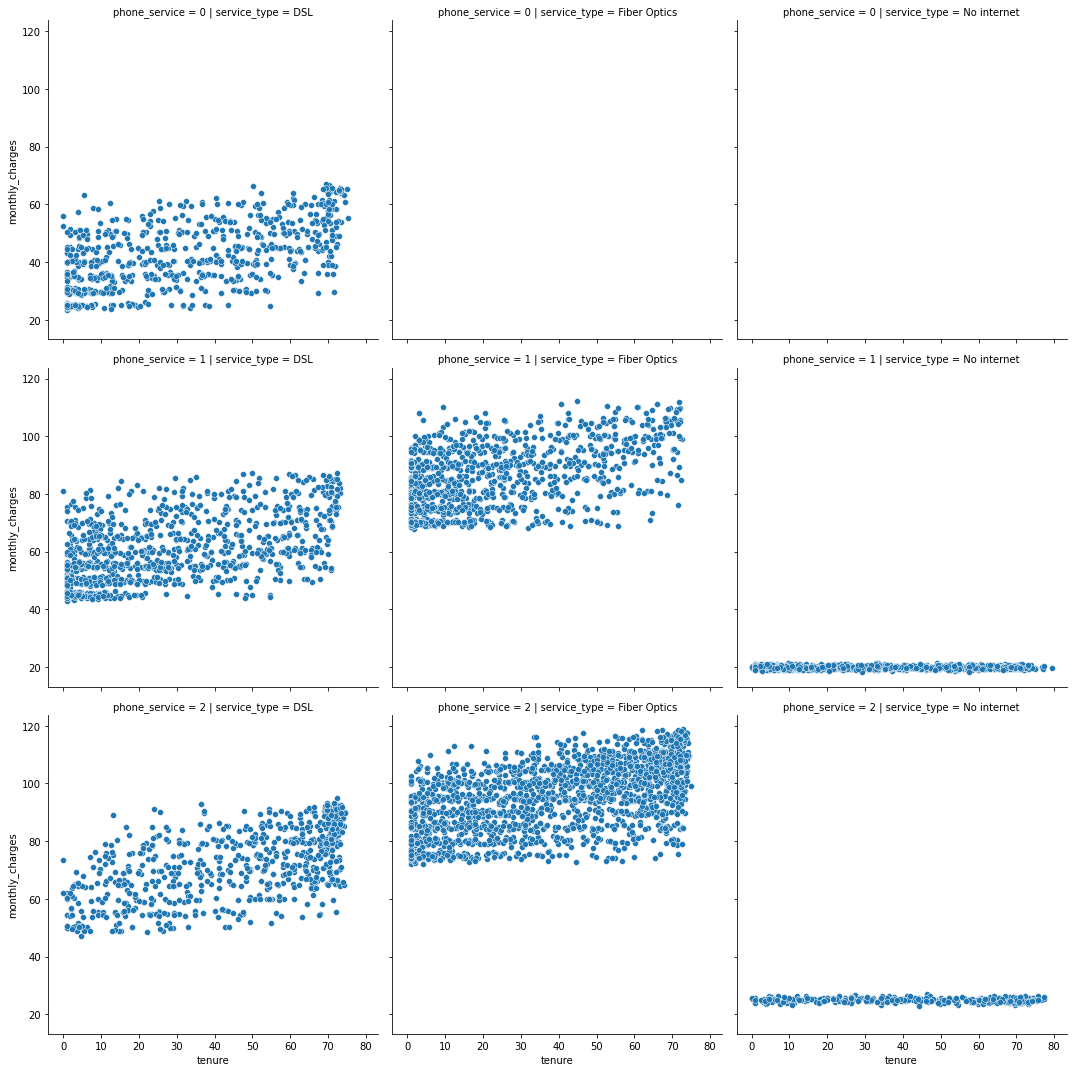

In [164]:
sns.relplot(data=df, y='monthly_charges', x='tenure', col='service_type', row='phone_service')
#sns.relplot(data=df, y='monthly_charges', x='tenure', col='internet_service_type', row='phone_service')


Overall, r & p scores demonstrate a weak positive correlation, but the magnitude of the relationship is relatively small


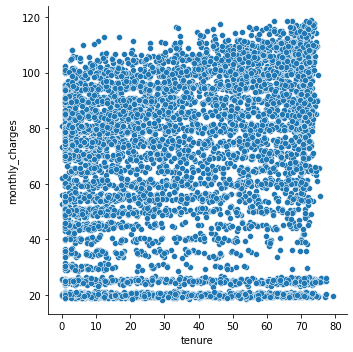

In [165]:
sns.relplot(data=df, y='monthly_charges', x='tenure')


Use the employees database.

Is there a relationship between how long an employee has been with the company and their salary?

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [90]:
from env import get_db_url
url = get_db_url("employees")
emp_sal = pd.read_sql('SELECT * FROM salaries', url )


In [155]:
querry = '''SELECT
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()'''
emp_sal =  pd.read_sql(query, url)
#date diff syntax(SELECT DATEDIFF("bigger date", "smaller date");)

In [168]:
emp_sal.dropna()


,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692
...,...,...
240119,2572,52868
240120,3410,69501
240121,5030,83441
240122,2298,55003


In [169]:
emp_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   tenure  240124 non-null  int64
 1   salary  240124 non-null  int64
dtypes: int64(2)
memory usage: 3.7 MB


In [145]:
emp_sal.sample(10)

,tenure,salary
145416,3042,87286
226318,3980,92528
79008,3749,72187
59122,468,70176
236741,5435,99940
3071,3617,68836
210818,2452,61886
53164,3261,68348
150624,2610,57291
81318,2812,68663


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


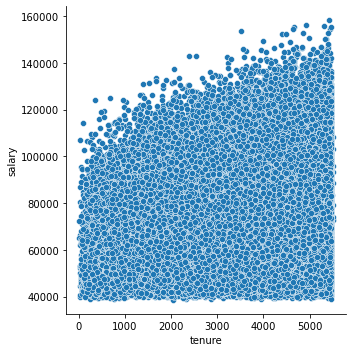

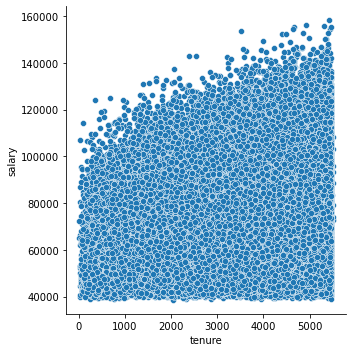

In [178]:
x = emp_sal["tenure"]
y = emp_sal["salary"]
sns.relplot(x,y)
sns.relplot(data= emp_sal, y=y , x=x)

In [177]:
stats.pearsonr(emp_sal.tenure, emp_sal.salary)

(0.30646256131860783, 0.0)

reject the null hypothesis however the correlation is weak

In [184]:
query1 = '''
SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
FROM employees e
JOIN (
    SELECT emp_no, COUNT(*) as n_titles
    FROM employees e
    JOIN titles t USING (emp_no)
    GROUP BY emp_no
) emp_title_count USING (emp_no)
'''

In [185]:
emp_titles = pd.read_sql(query1, url)


In [186]:
emp_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   emp_no    300024 non-null  int64
 1   tenure    300024 non-null  int64
 2   n_titles  300024 non-null  int64
dtypes: int64(3)
memory usage: 6.9 MB


In [187]:
emp_titles.head(5)


,emp_no,tenure,n_titles
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2


In [188]:
stats.pearsonr(emp_titles.tenure, emp_titles.n_titles )

(0.26659892991366196, 0.0)

we reject the null hypothesis however the correlation is weak. 

In [191]:
import pydataset
pydataset.data('sleepstudy', show_doc=True)


sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [193]:
sleep = pydataset.data('sleepstudy')
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [196]:
sleep.sample(20)

,Reaction,Days,Subject
123,269.8939,2,351
38,318.2613,7,330
81,241.6083,0,335
18,217.7272,7,309
151,225.2640,0,370
157,281.1481,6,370
168,304.6306,7,371
104,254.9220,3,349
159,365.1630,8,370
97,404.2601,6,337


H0 there is no linear relationship between reaction time and number of days

Ha there is a linear relationship between reaction time and number of days



In [198]:
stats.pearsonr(sleep.Reaction, sleep.Days )

(0.5352302262650253, 9.894096322214812e-15)

In [ ]:
reject null hypothesis with a fairly strong correlation

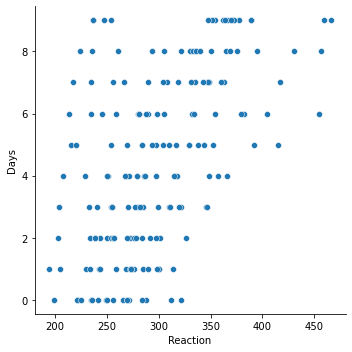

In [199]:
sns.relplot(data=sleep, x='Reaction', y='Days')